In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('hour.csv')

In [2]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
df.isna().sum(axis=0)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
np.sum((df.casual+df.registered)!=df.cnt)

0

In [10]:
np.unique(df.mnth)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [11]:
np.unique(df.hr)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [12]:
columns_to_drop =['casual', 'registered', 'dteday', 'instant']
inp1 = df.drop(columns_to_drop,axis =1).copy()

In [13]:
inp1.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


<AxesSubplot:ylabel='Density'>

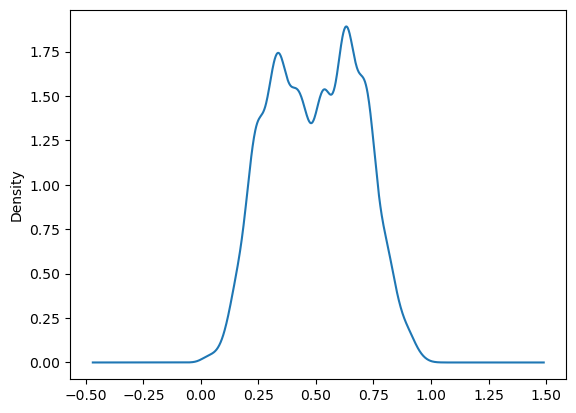

In [15]:
inp1.temp.plot.density()

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='atemp'>

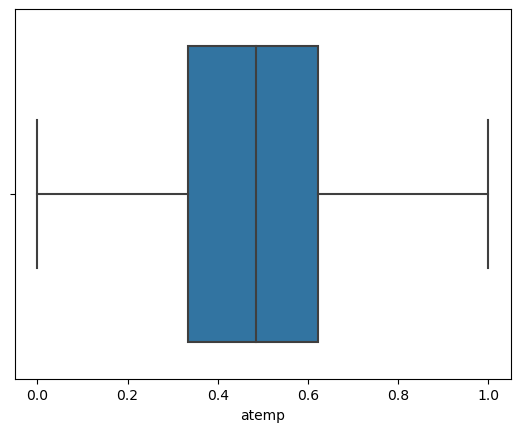

In [19]:
sns.boxplot(inp1.atemp)

<AxesSubplot:ylabel='Frequency'>

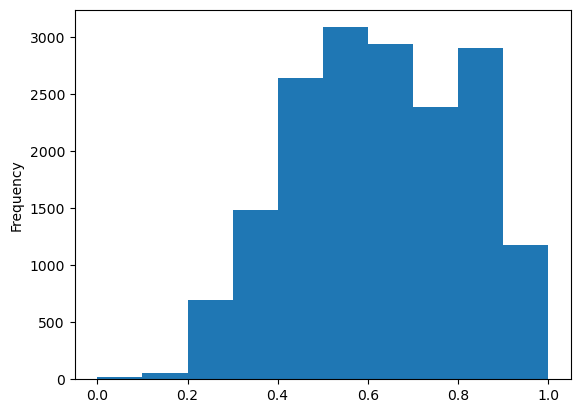

In [20]:
inp1.hum.plot.hist()

<AxesSubplot:ylabel='Density'>

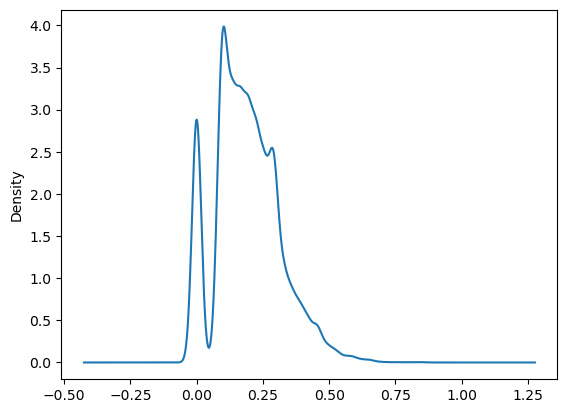

In [21]:
inp1.windspeed.plot.density()


<AxesSubplot:ylabel='Density'>

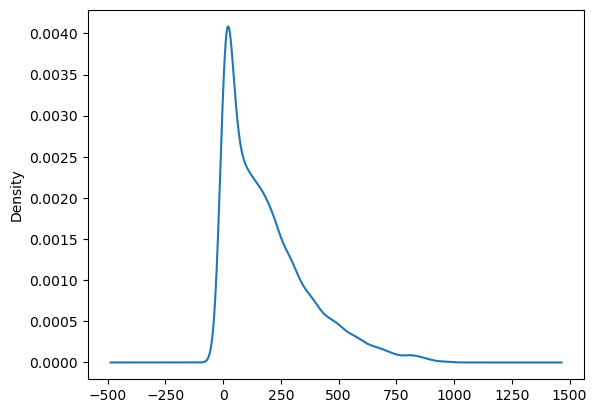

In [22]:
inp1.cnt.plot.density()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt'>

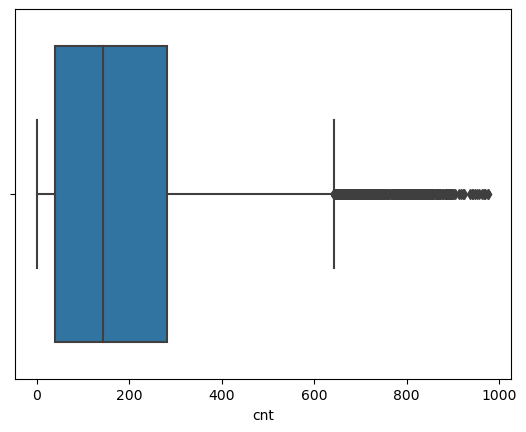

In [23]:
sns.boxplot(inp1.cnt)

In [24]:
inp1.cnt.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10      9.00
0.25     40.00
0.50    142.00
0.70    244.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64

In [25]:
inp2 = inp1[inp1.cnt < 563].copy()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hr', ylabel='cnt'>

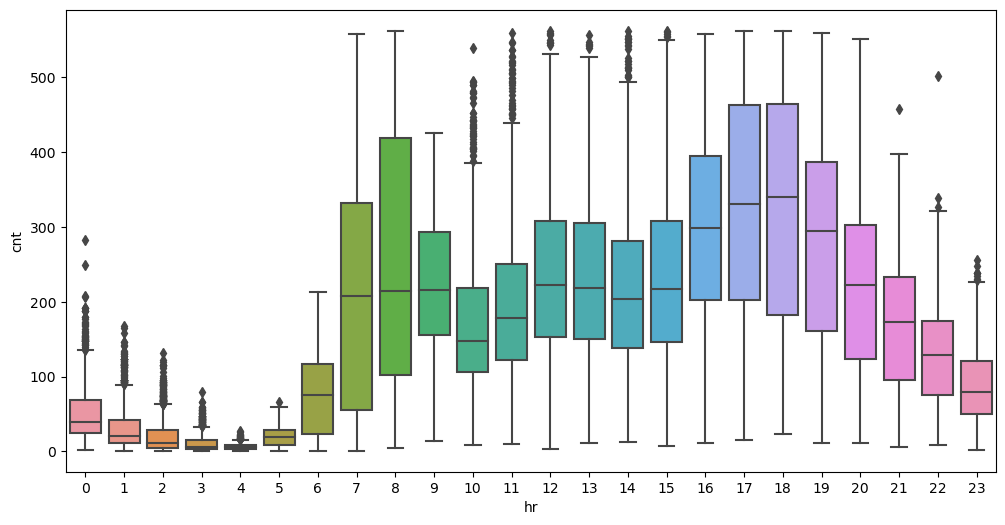

In [26]:
plt.figure(figsize=[12,6])
sns.boxplot("hr", "cnt", data=inp2)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='cnt'>

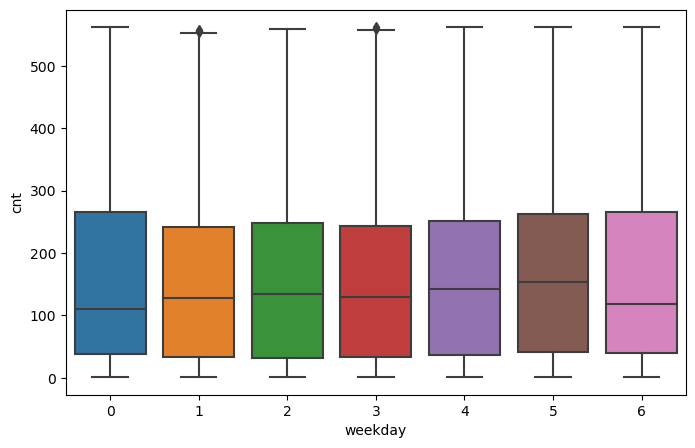

In [27]:
plt.figure(figsize=[8,5])
sns.boxplot("weekday", "cnt", data=inp2)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mnth', ylabel='cnt'>

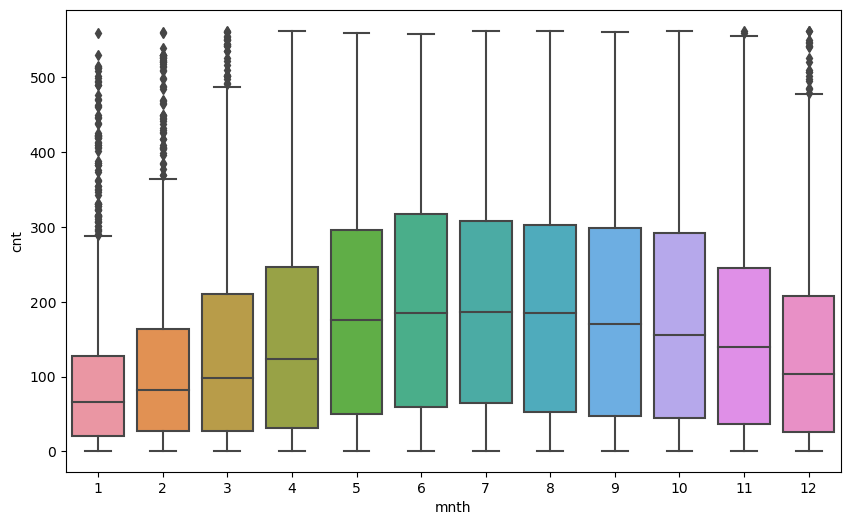

In [28]:
plt.figure(figsize=[10,6])
sns.boxplot("mnth", "cnt", data=inp2)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='cnt'>

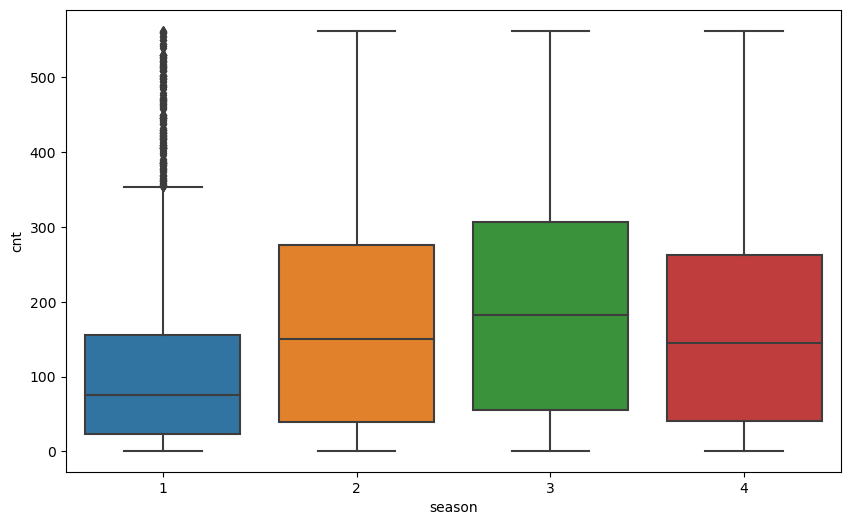

In [29]:
plt.figure(figsize=[10,6])
sns.boxplot("season", "cnt", data=inp2)

In [30]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
corrs = inp2[num_vars].corr()

<AxesSubplot:>

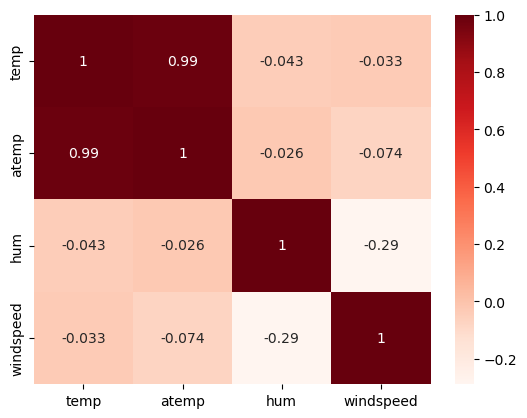

In [31]:
sns.heatmap(corrs, annot=True, cmap="Reds")

In [32]:
inp3 = inp2.copy()
inp3.mnth[inp3.mnth.isin([5,6,7,8,9])] = 5
np.unique(inp3.mnth)

C:\Users\Dell\AppData\Local\Temp\ipykernel_2980\2290649808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3.mnth[inp3.mnth.isin([5,6,7,8,9])] = 5


array([ 1,  2,  3,  4,  5, 10, 11, 12], dtype=int64)

In [33]:
np.unique(inp3.hr)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [34]:
cat_cols = ['season', 'weathersit', 'weekday', 'mnth', 'hr']
inp3 = pd.get_dummies(inp3, columns=cat_cols, drop_first=True)

In [35]:
inp3.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_1', 'hr_2', 'hr_3',
       'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11',
       'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19',
       'hr_20', 'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

In [36]:

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(inp3, train_size = 0.7, random_state = 100)

In [37]:
y_train = df_train.pop("cnt")
X_train = df_train

y_test = df_test.pop("cnt")
X_test = df_test

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
from sklearn.metrics import r2_score
y_train_pred= lr.predict(X_train)
r2_score(y_train, y_train_pred)

0.6738431368212411

In [40]:
y_test_pred= lr.predict(X_test)
r2_score(y_test, y_test_pred)

0.6686669278831132